In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt     
from pre import Training_data
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [2]:
def plot_history(history : tf.keras.callbacks.History):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'], label='training set')
    axs[0].plot(history.history['val_accuracy'], label = 'validation set')
    axs[0].set(xlabel = 'Epoch', ylabel='Accuracy', ylim=[0, 1])

    axs[1].plot(history.history['loss'], label='training set')
    axs[1].plot(history.history['val_loss'], label = 'validation set')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 10])
    
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='lower right')


In [3]:
#amount of classes
_AMOUNT_CLASSE = 11
training_data = Training_data('training',_AMOUNT_CLASSE)

#import the training data
_training_data = np.load('training_data.npy')
labels = np.load('training_labels.npy')

Files already exis, import them!
data: training_data.npy| labels: training_labels.npy


In [4]:
#getting the train and validation data
train_dice, val_dice, train_labels, val_labels = train_test_split(
    _training_data, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

In [5]:
#parameters
input_size = 128
filter = 30
epochs = 6
batchsize = 64
learning_rate=0.00001

strides = (2, 2)
pool_size = (2,2)
kernel_size = (5,5)

In [6]:

with tf.device('/GPU:0'):
    # Create the first version of the model
    model2 = models.Sequential([
        layers.Conv2D(filters=8,kernel_size=kernel_size,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation='relu',input_shape=(input_size,input_size,1)),
        layers.MaxPooling2D(pool_size=(6,6),strides=strides,padding='same'),
        layers.Dropout(0.4),
        layers.Flatten(),
        #layers.Dense(128,activation='relu'),
        layers.Dense(_AMOUNT_CLASSE,activation='Softmax'),
    ])
    model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 8)       208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 8)         0         
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 11)                338283    
                                                                 
Total params: 338,491
Trainable params: 338,491
Non-trainable params: 0
__________________________________________________

In [7]:

with tf.device('/GPU:0'):
    # Create the first version of the model
    model = models.Sequential([
        layers.Conv2D(filters=filter,kernel_size=kernel_size,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation='relu',input_shape=(128,128,1)),
        layers.MaxPooling2D(pool_size=pool_size,strides=strides,padding='same'),
        
        layers.Conv2D(filters=filter/2,kernel_size=kernel_size,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation='relu'),
        layers.MaxPooling2D(pool_size=pool_size,strides=strides,padding='same'),
        layers.Dropout(0.5),
        layers.Flatten(),
        #layers.Dense(128,activation='relu'),
        layers.Dense(_AMOUNT_CLASSE,activation='Softmax'),
    ])

    model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 124, 124, 30)      780       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 30)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 15)        11265     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 15)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 15)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12615)            

In [8]:
#compiling the models
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
#first model training
with tf.device('/GPU:0'):
    history = model.fit(train_dice,train_labels,epochs=epochs,validation_data=(val_dice,val_labels),batch_size=batchsize)


Epoch 1/6
83/83 [==============================] - 14s 132ms/step - loss: 2.3494 - accuracy: 0.1318 - val_loss: 2.2796 - val_accuracy: 0.1354
Epoch 2/6
83/83 [==============================] - 10s 120ms/step - loss: 2.2367 - accuracy: 0.1819 - val_loss: 2.1577 - val_accuracy: 0.2479
Epoch 3/6
83/83 [==============================] - 15s 176ms/step - loss: 2.0900 - accuracy: 0.2633 - val_loss: 1.9650 - val_accuracy: 0.4753
Epoch 4/6
83/83 [==============================] - 15s 177ms/step - loss: 1.8678 - accuracy: 0.4363 - val_loss: 1.6820 - val_accuracy: 0.7726
Epoch 5/6
83/83 [==============================] - 10s 124ms/step - loss: 1.5630 - accuracy: 0.6376 - val_loss: 1.3196 - val_accuracy: 0.9217
Epoch 6/6
83/83 [==============================] - 15s 176ms/step - loss: 1.2140 - accuracy: 0.7766 - val_loss: 0.9569 - val_accuracy: 1.0000


In [10]:
#second model training
with tf.device('/GPU:0'):
    history2 = model2.fit(train_dice,train_labels,epochs=epochs,validation_data=(val_dice,val_labels),batch_size=batchsize)

Epoch 1/6
83/83 [==============================] - 7s 76ms/step - loss: 2.2568 - accuracy: 0.1796 - val_loss: 1.9530 - val_accuracy: 0.2814
Epoch 2/6
83/83 [==============================] - 5s 58ms/step - loss: 1.8853 - accuracy: 0.3533 - val_loss: 1.6097 - val_accuracy: 0.7186
Epoch 3/6
83/83 [==============================] - 6s 68ms/step - loss: 1.5607 - accuracy: 0.5495 - val_loss: 1.3048 - val_accuracy: 0.9947
Epoch 4/6
83/83 [==============================] - 6s 72ms/step - loss: 1.2899 - accuracy: 0.6842 - val_loss: 1.0481 - val_accuracy: 1.0000
Epoch 5/6
83/83 [==============================] - 6s 72ms/step - loss: 1.0546 - accuracy: 0.7753 - val_loss: 0.8333 - val_accuracy: 1.0000
Epoch 6/6
83/83 [==============================] - 6s 72ms/step - loss: 0.8616 - accuracy: 0.8385 - val_loss: 0.6724 - val_accuracy: 1.0000


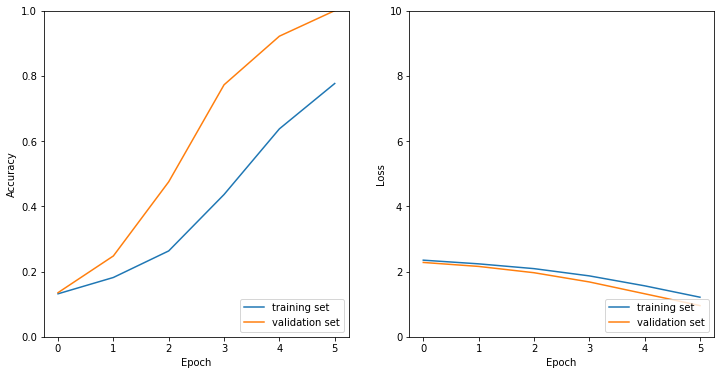

In [11]:
plot_history(history)

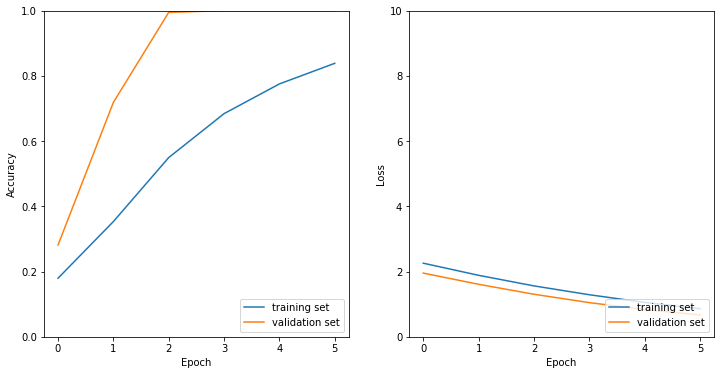

In [12]:
plot_history(history2)

In [13]:
model.save('model1')
model.save('model2')

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets
